# Curso: Machine Learning Lidando com dados de muitas dimensões


## Objetivos:
* Aprenda o que são dados de alta dimensionalidade.
* Crie um modelo de Machine Learning para classificação.
* Construa uma matriz de correlação com Pandas e Seaborn.
* Aprenda como selecionar feature com visualizações dos dados.
* Utilize o Scikit-learn para criar modelos de seleção de feature automáticos.
* Aprenda a utilizar técnicas de redução de dimensionalidade (PCA e T-SNE).


Link: https://cursos.alura.com.br/course/reducao-dimensionalidade

## Importando as bibliotécas necessárias

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Importando o dataset

In [4]:
url = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'
df = pd.read_csv(url)

## Explorando os dados e visualizando

In [5]:
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [6]:
df.shape

(569, 35)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [8]:
X = df.drop(['id', 'diagnostico'], axis=1)
y = df['diagnostico']

seed = 123143
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(X_train, y_train)
classificador.score(X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [16]:
df.isna().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [28]:
valores_exames = df.drop(['id', 'diagnostico'], axis=1)
y = df['diagnostico']
valores_exames_v1 = valores_exames.drop('exame_33', axis=1)

seed = 123143
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(valores_exames_v1, y, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(X_train, y_train)
resultado = classificador.score(X_test, y_test)

print(f'O resultado da classificação é: {resultado:0.2%}')

O resultado da classificação é: 92.40%


In [29]:
seed = 123143
np.random.seed(seed)

classificador_bobo = DummyClassifier(strategy='most_frequent')
classificador_bobo.fit(X_train, y_train)
resultado = classificador_bobo.score(X_test, y_test)

print(f'O resultado do classificador dummy é: {resultado:0.2%}')

O resultado do classificador dummy é: 66.67%


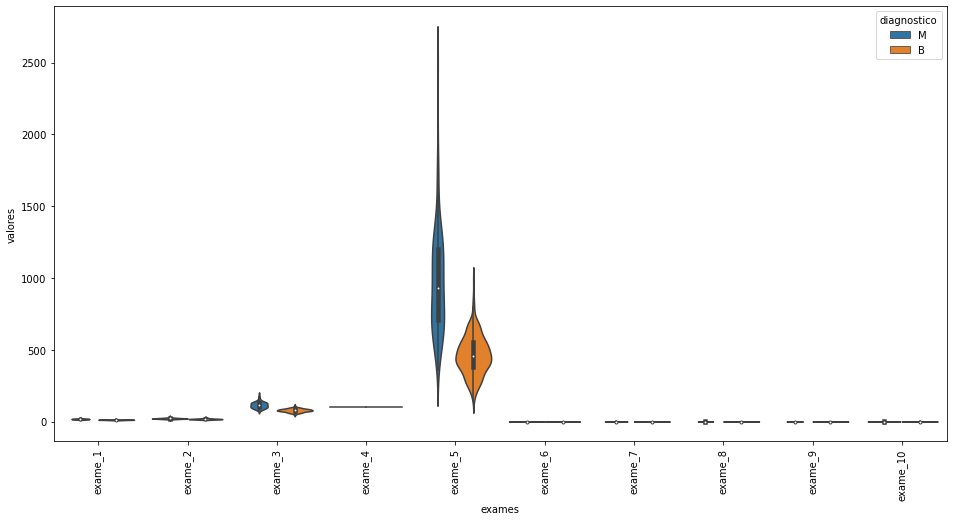

In [46]:
dados_plot = pd.concat([y, valores_exames_v1.iloc[:, :10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

fig, ax = plt.subplots(figsize=(16,8))
sns.violinplot(x='exames', y='valores', data=dados_plot, ax=ax, hue='diagnostico')
plt.xticks(rotation=90)

plt.show()

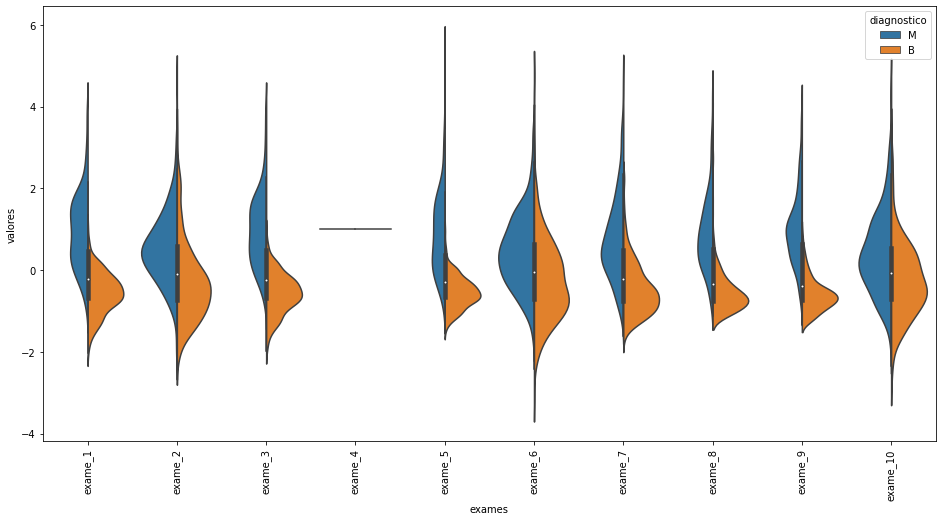

In [55]:
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)

valores_exames_v2 = pd.DataFrame(valores_exames_v2, columns=valores_exames_v1.columns)

dados_plot = pd.concat([y, valores_exames_v2.iloc[:, :10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

fig, ax = plt.subplots(figsize=(16,8))
sns.violinplot(x='exames', y='valores', data=dados_plot, ax=ax, hue='diagnostico', split=True)
plt.xticks(rotation=90)

plt.show()